## Métricas de viajes en Borough y Zonas para Yellow taxi
#### Utilizando el dataset: ‘yellow_tripdata_2023-09.parquet’ 
Heidi 7/12/23
Siguiendo la sugerencia del repo NYC Taxis CO2” se validan las Ideas de análisis e implementación
* Viajes inter e intra boroughs
* Borough con mayor/menor cantidad de viajes
* Viajes entre distintas Zonas


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


Abir dataset de taxis de NYC

In [4]:


# Especifica la ruta del archivo Parquet
ruta_archivo_parquet = 'Datasets\yellow_tripdata_2023-09.parquet' 

# Lee el archivo Parquet en un DataFrame de pandas
df_yellow_taxi_2023_09 = pd.read_parquet(ruta_archivo_parquet)

# Muestra las primeras filas del DataFrame
df_yellow_taxi_2023_09.head(20)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-09-01 00:15:37,2023-09-01 00:20:21,1.0,0.80,1.0,N,163,230,2,6.5,3.5,0.5,0.00,0.00,1.0,11.50,2.5,0.00
1,2,2023-09-01 00:18:40,2023-09-01 00:30:28,2.0,2.34,1.0,N,236,233,1,14.2,1.0,0.5,2.00,0.00,1.0,21.20,2.5,0.00
2,2,2023-09-01 00:35:01,2023-09-01 00:39:04,1.0,1.62,1.0,N,162,236,1,8.6,1.0,0.5,2.00,0.00,1.0,15.60,2.5,0.00
3,2,2023-09-01 00:45:45,2023-09-01 00:47:37,1.0,0.74,1.0,N,141,229,1,5.1,1.0,0.5,1.00,0.00,1.0,11.10,2.5,0.00
4,2,2023-09-01 00:01:23,2023-09-01 00:38:05,1.0,9.85,1.0,N,138,230,1,45.0,6.0,0.5,17.02,0.00,1.0,73.77,2.5,1.75
5,2,2023-09-01 00:05:20,2023-09-01 00:46:57,3.0,12.83,1.0,N,93,75,2,55.5,1.0,0.5,0.00,6.94,1.0,67.44,2.5,0.00
6,1,2023-09-01 00:51:50,2023-09-01 01:10:21,0.0,10.90,1.0,N,93,255,1,41.5,1.0,0.5,3.00,0.00,1.0,47.00,0.0,0.00
7,1,2023-09-01 00:01:04,2023-09-01 00:18:36,1.0,3.90,1.0,N,140,7,1,20.5,3.5,0.5,6.35,0.00,1.0,31.85,2.5,0.00
8,2,2023-09-01 00:37:44,2023-09-01 00:52:24,2.0,2.70,1.0,N,45,164,1,16.3,1.0,0.5,4.26,0.00,1.0,25.56,2.5,0.00
9,2,2023-09-01 00:02:13,2023-09-01 00:07:12,1.0,1.02,1.0,N,238,236,1,7.9,1.0,0.5,2.58,0.00,1.0,15.48,2.5,0.00


In [5]:
df_yellow_taxi_2023_0.info()

NameError: name 'df_yellow_taxi_2023_0' is not defined

Selecciono las columnas a utilizar para responder a las metricas

In [7]:
df_yellow_taxi_2023_09_Borough = df_yellow_taxi_2023_09[['VendorID',	'tpep_pickup_datetime',	'tpep_dropoff_datetime','PULocationID','DOLocationID']]
df_yellow_taxi_2023_09_Borough

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,PULocationID,DOLocationID
0,1,2023-09-01 00:15:37,2023-09-01 00:20:21,163,230
1,2,2023-09-01 00:18:40,2023-09-01 00:30:28,236,233
2,2,2023-09-01 00:35:01,2023-09-01 00:39:04,162,236
3,2,2023-09-01 00:45:45,2023-09-01 00:47:37,141,229
4,2,2023-09-01 00:01:23,2023-09-01 00:38:05,138,230
...,...,...,...,...,...
2846717,2,2023-09-30 23:31:12,2023-09-30 23:48:29,125,107
2846718,1,2023-09-30 23:42:18,2023-09-30 23:47:45,236,75
2846719,1,2023-09-30 23:03:35,2023-09-30 23:14:50,211,90
2846720,2,2023-09-30 23:57:05,2023-10-01 00:17:36,209,97


Abro el archivo de zonas y Borough

In [8]:
df_taxi_zone_lookup = pd.read_csv('Datasets\\taxi+_zone_lookup.csv')
df_taxi_zone_lookup

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NV,NaN


Uno el dataset de taxis con el de zonas y borough

In [9]:
import pandas as pd

# Supongamos que df_taxi_2023_09_Borough y df_taxi_zone_lookup son tus DataFrames originales

# Merging para obtener información de partida
df_merged_yellow_taxi_Borough_Zona = pd.merge(df_yellow_taxi_2023_09_Borough, df_taxi_zone_lookup, left_on='PULocationID', right_on='LocationID', how='left')
df_merged_yellow_taxi_Borough_Zona.rename(columns={'Borough': 'Partida_Borough', 'Zone': 'Partida_Zone'}, inplace=True)
df_merged_yellow_taxi_Borough_Zona.drop(columns=['LocationID', 'service_zone'], inplace=True)

# Merging para obtener información de destino
df_merged_yellow_taxi_Borough_Zona = pd.merge(df_merged_yellow_taxi_Borough_Zona, df_taxi_zone_lookup, left_on='DOLocationID', right_on='LocationID', how='left')
df_merged_yellow_taxi_Borough_Zona.rename(columns={'Borough': 'Destino_Borough', 'Zone': 'Destino_Zone'}, inplace=True)
df_merged_yellow_taxi_Borough_Zona.drop(columns=['LocationID', 'service_zone'], inplace=True)

# Ahora df_merged tiene las nuevas columnas que necesitas


In [14]:
df_merged_yellow_taxi_Borough_Zona

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,PULocationID,DOLocationID,Partida_Borough,Partida_Zone,Destino_Borough,Destino_Zone,Borough_Category
0,1,2023-09-01 00:15:37,2023-09-01 00:20:21,163,230,Manhattan,Midtown North,Manhattan,Times Sq/Theatre District,Intra Borough
1,2,2023-09-01 00:18:40,2023-09-01 00:30:28,236,233,Manhattan,Upper East Side North,Manhattan,UN/Turtle Bay South,Intra Borough
2,2,2023-09-01 00:35:01,2023-09-01 00:39:04,162,236,Manhattan,Midtown East,Manhattan,Upper East Side North,Intra Borough
3,2,2023-09-01 00:45:45,2023-09-01 00:47:37,141,229,Manhattan,Lenox Hill West,Manhattan,Sutton Place/Turtle Bay North,Intra Borough
4,2,2023-09-01 00:01:23,2023-09-01 00:38:05,138,230,Queens,LaGuardia Airport,Manhattan,Times Sq/Theatre District,Inter Borough
...,...,...,...,...,...,...,...,...,...,...
2846717,2,2023-09-30 23:31:12,2023-09-30 23:48:29,125,107,Manhattan,Hudson Sq,Manhattan,Gramercy,Intra Borough
2846718,1,2023-09-30 23:42:18,2023-09-30 23:47:45,236,75,Manhattan,Upper East Side North,Manhattan,East Harlem South,Intra Borough
2846719,1,2023-09-30 23:03:35,2023-09-30 23:14:50,211,90,Manhattan,SoHo,Manhattan,Flatiron,Intra Borough
2846720,2,2023-09-30 23:57:05,2023-10-01 00:17:36,209,97,Manhattan,Seaport,Brooklyn,Fort Greene,Inter Borough


Creo la columna de viajes intra o inter borough

In [ ]:
# Agregar una nueva columna 'Borough_Category' basada en la comparación de las columnas 'Partida_Borough' y 'Destino_Borough'
df_merged_yellow_taxi_Borough_Zona['Borough_Category'] = df_merged_yellow_taxi_Borough_Zona.apply(lambda row: 'Intra Borough' if row['Partida_Borough'] == row['Destino_Borough'] else 'Inter Borough', axis=1)


In [25]:
df_merged_yellow_taxi_Borough_Zona

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,PULocationID,DOLocationID,Partida_Borough,Partida_Zone,Destino_Borough,Destino_Zone,Borough_Category
0,1,2023-09-01 00:15:37,2023-09-01 00:20:21,163,230,Manhattan,Midtown North,Manhattan,Times Sq/Theatre District,Intra Borough
1,2,2023-09-01 00:18:40,2023-09-01 00:30:28,236,233,Manhattan,Upper East Side North,Manhattan,UN/Turtle Bay South,Intra Borough
2,2,2023-09-01 00:35:01,2023-09-01 00:39:04,162,236,Manhattan,Midtown East,Manhattan,Upper East Side North,Intra Borough
3,2,2023-09-01 00:45:45,2023-09-01 00:47:37,141,229,Manhattan,Lenox Hill West,Manhattan,Sutton Place/Turtle Bay North,Intra Borough
4,2,2023-09-01 00:01:23,2023-09-01 00:38:05,138,230,Queens,LaGuardia Airport,Manhattan,Times Sq/Theatre District,Inter Borough
...,...,...,...,...,...,...,...,...,...,...
2846717,2,2023-09-30 23:31:12,2023-09-30 23:48:29,125,107,Manhattan,Hudson Sq,Manhattan,Gramercy,Intra Borough
2846718,1,2023-09-30 23:42:18,2023-09-30 23:47:45,236,75,Manhattan,Upper East Side North,Manhattan,East Harlem South,Intra Borough
2846719,1,2023-09-30 23:03:35,2023-09-30 23:14:50,211,90,Manhattan,SoHo,Manhattan,Flatiron,Intra Borough
2846720,2,2023-09-30 23:57:05,2023-10-01 00:17:36,209,97,Manhattan,Seaport,Brooklyn,Fort Greene,Inter Borough


## Viajes Inter e Intra Boroughs

In [17]:
# Contar la cantidad de viajes Intra e Inter Boroughs
intra_borough_count = df_merged_yellow_taxi_Borough_Zona[df_merged_yellow_taxi_Borough_Zona['Borough_Category'] == 'Intra Borough'].shape[0]
inter_borough_count = df_merged_yellow_taxi_Borough_Zona[df_merged_yellow_taxi_Borough_Zona['Borough_Category'] == 'Inter Borough'].shape[0]

print(f'Cantidad de viajes Intra Boroughs: {intra_borough_count}')
print(f'Cantidad de viajes Inter Boroughs: {inter_borough_count}')


Cantidad de viajes Intra Boroughs: 2426371
Cantidad de viajes Inter Boroughs: 420351


#### Distribución de Viajes dentro del mismo Borough y entre distintos Borough


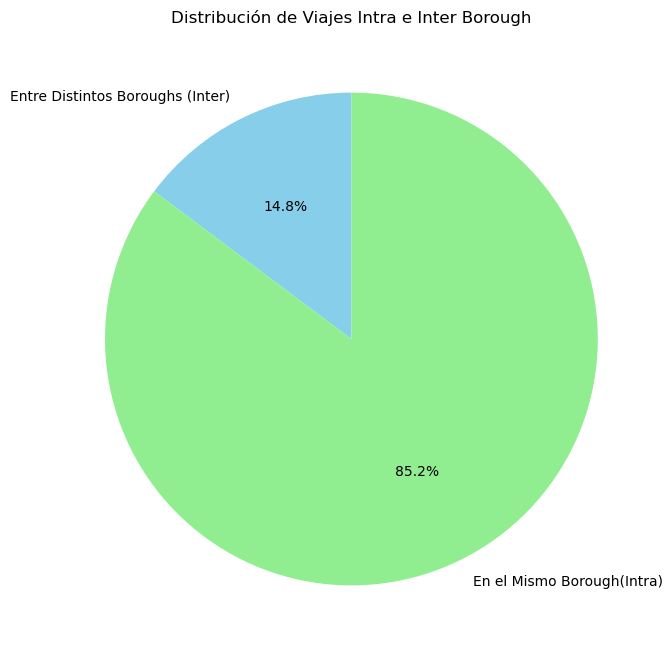

In [19]:
# que representan la cantidad de viajes entre distintas zonas y en la misma zona, respectivamente.

# Crear datos para el gráfico de torta
labels = ['Entre Distintos Boroughs (Inter)', 'En el Mismo Borough(Intra)']
sizes = [inter_borough_count, intra_borough_count]
colors = ['skyblue', 'lightgreen']

# Crear el gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Viajes Intra e Inter Borough')


plt.show()


La cantidad de viajes Intra Boroughs fue de 2426371 mientras que la Cantidad de viajes Inter Boroughs: 420351	

## Borough con mayor/menor cantidad de INTRA viajes

In [20]:
# Filtrar solo los viajes Intra Borough
intra_borough_trips = df_merged_yellow_taxi_Borough_Zona[df_merged_yellow_taxi_Borough_Zona['Borough_Category'] == 'Intra Borough']

# Contar la cantidad de viajes Intra Borough por cada borough
intra_borough_trip_counts = intra_borough_trips['Partida_Borough'].value_counts()

# Obtener el borough con mayor cantidad de viajes Intra Borough
borough_intra_max = intra_borough_trip_counts.idxmax()
cantidad_viajes_intra_max = intra_borough_trip_counts.max()

# Obtener el borough con menor cantidad de viajes Intra Borough
borough_intra_min = intra_borough_trip_counts.idxmin()
cantidad_viajes_intra_min = intra_borough_trip_counts.min()

print(f'Borough con mayor cantidad de viajes Intra Borough: {borough_intra_max} ({cantidad_viajes_intra_max} viajes)')
print(f'Borough con menor cantidad de viajes Intra Borough: {borough_intra_min} ({cantidad_viajes_intra_min} viajes)')


Borough con mayor cantidad de viajes Intra Borough: Manhattan (2315292 viajes)
Borough con menor cantidad de viajes Intra Borough: Staten Island (57 viajes)


####  Cantidad de viajes Intra Borough por borough en un gráfico

Cantidad de Viajes Intra Boroughs por Borough (viaje dentro de un mismo Borough):

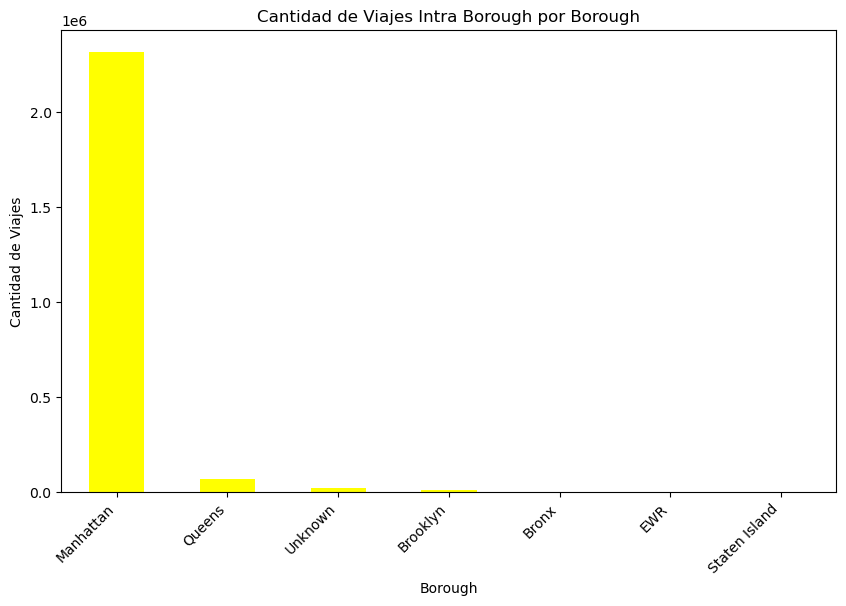

In [22]:


# Filtrar solo los viajes Intra Borough
intra_borough_trips = df_merged_yellow_taxi_Borough_Zona[df_merged_yellow_taxi_Borough_Zona['Borough_Category'] == 'Intra Borough']

# Contar la cantidad de viajes Intra Borough por cada borough
intra_borough_trip_counts = intra_borough_trips['Partida_Borough'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
intra_borough_trip_counts.plot(kind='bar', color='yellow')
plt.title('Cantidad de Viajes Intra Borough por Borough')
plt.xlabel('Borough')
plt.ylabel('Cantidad de Viajes')
plt.xticks(rotation=45, ha='right')
plt.show()


Borough con mayor cantidad de viajes Intra Borough: Manhattan (2315292 viajes).  El Borough con menor cantidad de viajes Intra Borough: Staten Island (57 viajes)


#### "Análisis de Viajes INTER Boroughs por Combinación de Partida y Destino"



In [28]:
# Filtrar solo los viajes Inter Borough
inter_borough_trips = df_merged_yellow_taxi_Borough_Zona[df_merged_yellow_taxi_Borough_Zona['Borough_Category'] == 'Inter Borough']

# Contar la cantidad de viajes para cada combinación de Partida_Borough y Destino_Borough
inter_borough_counts = inter_borough_trips.groupby(['Partida_Borough', 'Destino_Borough']).size().reset_index(name='Cantidad_Viajes')

# Ordenar el DataFrame inter_borough_counts de mayor a menor cantidad de viajes
inter_borough_counts_sorted = inter_borough_counts.sort_values(by='Cantidad_Viajes', ascending=False)

# Mostrar el resultado ordenado
print('Cantidad de viajes para cada combinación de Partida_Borough y Destino_Borough (de mayor a menor) para Yellow Taxis:')
print(inter_borough_counts_sorted)


Cantidad de viajes para cada combinación de Partida_Borough y Destino_Borough (de mayor a menor) para Yellow Taxis:
   Partida_Borough Destino_Borough  Cantidad_Viajes
23          Queens       Manhattan           165556
17       Manhattan          Queens            88527
15       Manhattan        Brooklyn            58841
21          Queens        Brooklyn            43421
19       Manhattan         Unknown            10942
25          Queens         Unknown             9485
7         Brooklyn       Manhattan             9262
16       Manhattan             EWR             8188
14       Manhattan           Bronx             8140
20          Queens           Bronx             6413
8         Brooklyn          Queens             3042
34         Unknown       Manhattan             2803
2            Bronx       Manhattan             1937
35         Unknown          Queens              506
22          Queens             EWR              447
3            Bronx          Queens              442


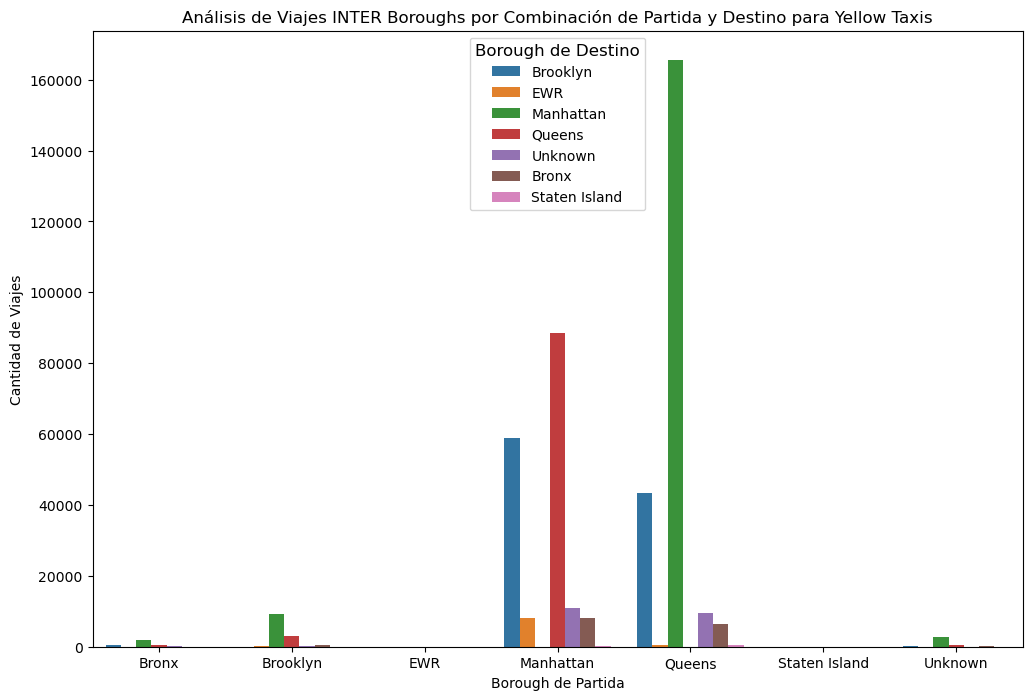

In [29]:


# Filtrar solo los viajes INTER Boroughs
inter_borough_trips = df_merged_yellow_taxi_Borough_Zona[df_merged_yellow_taxi_Borough_Zona['Borough_Category'] == 'Inter Borough']

# Contar la cantidad de viajes para cada combinación de Partida_Borough y Destino_Borough
inter_borough_counts = inter_borough_trips.groupby(['Partida_Borough', 'Destino_Borough']).size().reset_index(name='Cantidad_Viajes')

# Crear un gráfico de barras con colores distintos para cada combinación
plt.figure(figsize=(12, 8))
sns.barplot(x='Partida_Borough', y='Cantidad_Viajes', hue='Destino_Borough', data=inter_borough_counts)
plt.title('Análisis de Viajes INTER Boroughs por Combinación de Partida y Destino para Yellow Taxis')
plt.xlabel('Borough de Partida')
plt.ylabel('Cantidad de Viajes')
plt.legend(title='Borough de Destino', title_fontsize='12')
plt.show()


Se puede ver que los viajes más frencuentes son de Queens a Manhattan (165556 viajes) y viceversa de Manhattan a Queens (88527- viajes ).

## Viajes por zonas


#### Cantidad de viajes entre distintas (INTER) zonas 

In [30]:
# Contar la cantidad de viajes entre distintas zonas
viajes_entre_zonas_count = df_merged_yellow_taxi_Borough_Zona[df_merged_yellow_taxi_Borough_Zona['Partida_Zone'] != df_merged_yellow_taxi_Borough_Zona['Destino_Zone']].shape[0]

print(f'Cantidad de viajes entre distintas zonas para Yellow Taxis: {viajes_entre_zonas_count}')


Cantidad de viajes entre distintas zonas para Yellow Taxis: 2683471


In [32]:
# Contar la cantidad de viajes entre distintas zonas
viajes_en_misma_zona_count = df_merged_yellow_taxi_Borough_Zona[df_merged_yellow_taxi_Borough_Zona['Partida_Zone'] == df_merged_yellow_taxi_Borough_Zona['Destino_Zone']].shape[0]

print(f'Cantidad de viajes en la misma zona para Yellow Taxis: {viajes_en_misma_zona_count}')


Cantidad de viajes en la misma zona para Yellow Taxis: 163251


#### Cantidad de Viajes Intra Zona vs Inter Zona

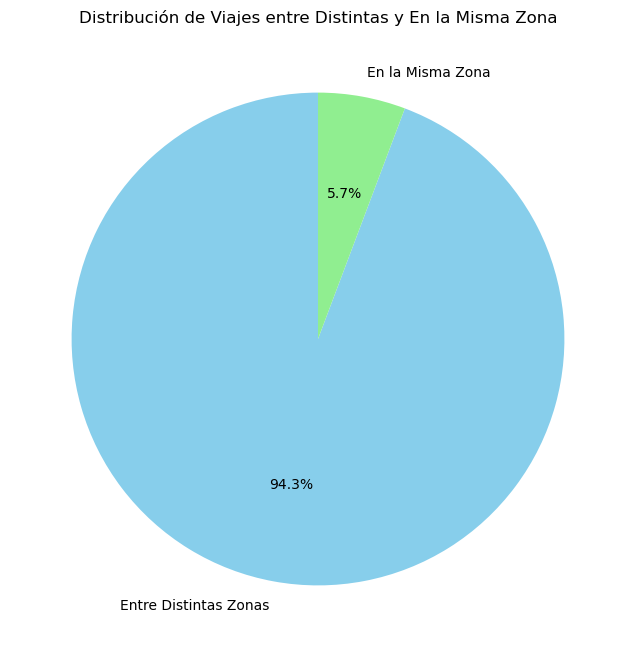

In [33]:
# Contar la cantidad de viajes entre distintas zonas y en la misma zona
viajes_entre_zonas_count = df_merged_yellow_taxi_Borough_Zona[df_merged_yellow_taxi_Borough_Zona['Partida_Zone'] != df_merged_yellow_taxi_Borough_Zona['Destino_Zone']].shape[0]
viajes_en_misma_zona_count = df_merged_yellow_taxi_Borough_Zona[df_merged_yellow_taxi_Borough_Zona['Partida_Zone'] == df_merged_yellow_taxi_Borough_Zona['Destino_Zone']].shape[0]

# Crear datos para el gráfico de torta
labels = ['Entre Distintas Zonas', 'En la Misma Zona']
sizes = [viajes_entre_zonas_count, viajes_en_misma_zona_count]
colors = ['skyblue', 'lightgreen']

# Crear el gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Viajes entre Distintas y En la Misma Zona')
plt.show()

Son más frecuentes los viajes entre distintas zonas. 


#### Cantidad de viajes entre distintas zonas por combinación de Partida_Zone y Destino_Zone (indistinto al orden):

In [34]:

# Supongamos que df_merged es tu DataFrame original

# Filtrar solo los viajes entre distintas zonas
viajes_entre_zonas_counts = df_merged_yellow_taxi_Borough_Zona[df_merged_yellow_taxi_Borough_Zona['Partida_Zone'] != df_merged_yellow_taxi_Borough_Zona['Destino_Zone']]

# Crear una nueva columna con combinaciones ordenadas alfabéticamente
viajes_entre_zonas_counts['Combinacion_Zonas'] = viajes_entre_zonas_counts.apply(lambda row: '-'.join(sorted([str(row['Partida_Zone']), str(row['Destino_Zone'])])), axis=1)

# Contar la cantidad de viajes para cada combinación de zonas
viajes_entre_zonas_counts_aggregated = viajes_entre_zonas_counts.groupby('Combinacion_Zonas').size().reset_index(name='Cantidad_Viajes')

# Ordenar el DataFrame por la cantidad de viajes de mayor a menor
viajes_entre_zonas_counts_aggregated_sorted = viajes_entre_zonas_counts_aggregated.sort_values(by='Cantidad_Viajes', ascending=False)

# Mostrar el resultado
print('Cantidad de viajes entre distintas zonas por combinación de Partida_Zone y Destino_Zone (indistinto al orden) para Yellow Taxis:')
viajes_entre_zonas_counts_aggregated_sorted.head()

C:\Users\Heidi\AppData\Local\Temp\ipykernel_4416\2044195630.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  viajes_entre_zonas_counts['Combinacion_Zonas'] = viajes_entre_zonas_counts.apply(lambda row: '-'.join(sorted([str(row['Partida_Zone']), str(row['Destino_Zone'])])), axis=1)


Cantidad de viajes entre distintas zonas por combinación de Partida_Zone y Destino_Zone (indistinto al orden) para Yellow Taxis:


,Combinacion_Zonas,Cantidad_Viajes
15840,Upper East Side North-Upper East Side South,37254
13298,Midtown Center-Upper East Side South,17183
12222,Lincoln Square East-Upper West Side South,14132
13297,Midtown Center-Upper East Side North,13162
13394,Midtown East-Upper East Side South,12993


In [35]:
viajes_entre_zonas_counts_aggregated_sorted.to_csv('viajes entre distintas zonas.csv')
Veinte_Inter_Zonas_con_mas_viajes = viajes_entre_zonas_counts_aggregated_sorted.head(20)
Veinte_Inter_Zonas_con_mas_viajes

,Combinacion_Zonas,Cantidad_Viajes
15840,Upper East Side North-Upper East Side South,37254
13298,Midtown Center-Upper East Side South,17183
12222,Lincoln Square East-Upper West Side South,14132
13297,Midtown Center-Upper East Side North,13162
13394,Midtown East-Upper East Side South,12993
15893,Upper West Side North-Upper West Side South,12757
12111,Lenox Hill West-Upper East Side North,12086
12112,Lenox Hill West-Upper East Side South,11174
15842,Upper East Side North-Upper West Side South,10736
12220,Lincoln Square East-Upper East Side South,10669


#### Grafico Veinte Combinaciones de Zonas con más Viajes]

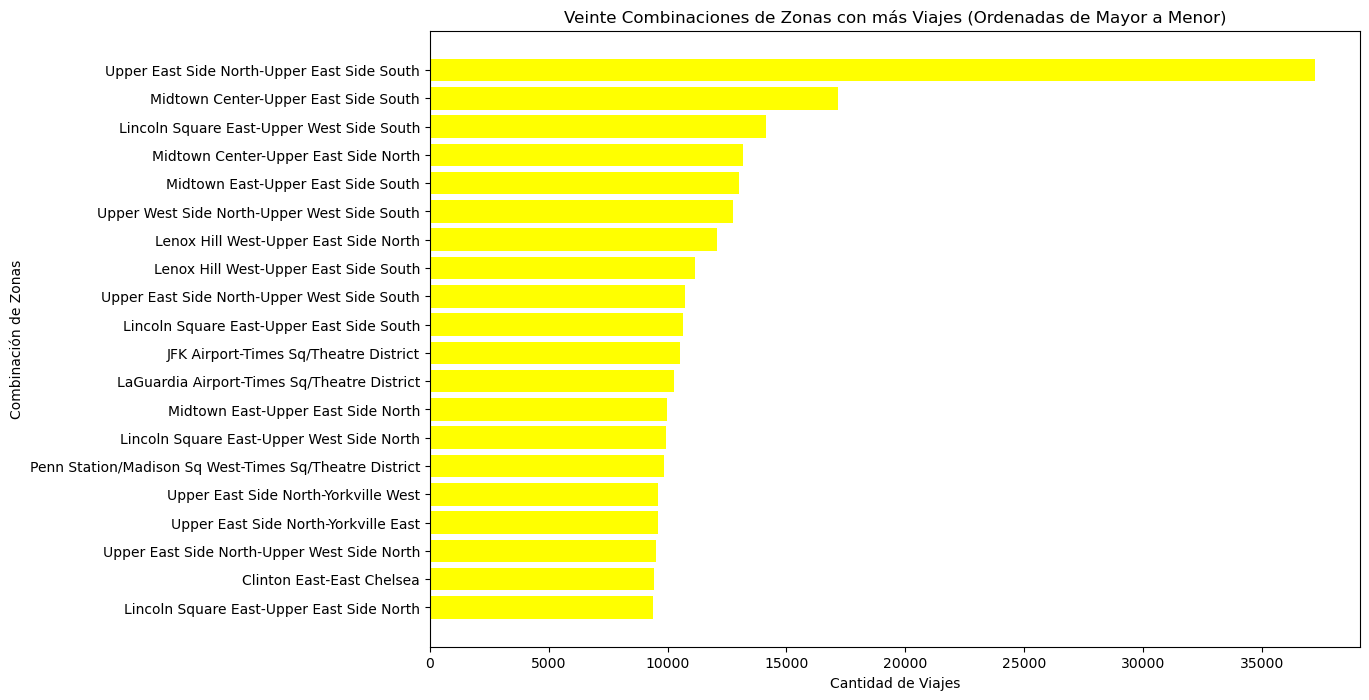

In [36]:
# Ordenar el DataFrame de mayor a menor por la columna 'Cantidad_Viajes'
Veinte_Inter_Zonas_con_mas_viajes_sorted = Veinte_Inter_Zonas_con_mas_viajes.sort_values(by='Cantidad_Viajes', ascending=True)

# Crear un gráfico de barras horizontales
plt.figure(figsize=(12, 8))
plt.barh(Veinte_Inter_Zonas_con_mas_viajes_sorted['Combinacion_Zonas'], Veinte_Inter_Zonas_con_mas_viajes_sorted['Cantidad_Viajes'], color='yellow')
plt.xlabel('Cantidad de Viajes')
plt.ylabel('Combinación de Zonas')
plt.title('Veinte Combinaciones de Zonas con más Viajes (Ordenadas de Mayor a Menor)')
plt.show()

La ruta más frecuente entre zonas ees: Upper East Side North-Upper East Side South con	37254 viajes. Le sigue Midtown Center-Upper East Side South con	17183 viajes.

In [37]:
Veinte_Inter_Zonas_con_mas_viajes.to_csv('20 Inter Zonas con mas viajes indiferente del orden Partida Destino.csv')


## Relacionar días y horarios de la semana con combinaciones de zonas de viaje

In [38]:
# Convertir las columnas de fecha y hora al formato datetime
df_merged_yellow_taxi_Borough_Zona['tpep_pickup_datetime'] = pd.to_datetime(df_merged_yellow_taxi_Borough_Zona['tpep_pickup_datetime'])
df_merged_yellow_taxi_Borough_Zona['tpep_dropoff_datetime'] = pd.to_datetime(df_merged_yellow_taxi_Borough_Zona['tpep_dropoff_datetime'])

# Agregar columnas para el día de la semana y la hora del día
df_merged_yellow_taxi_Borough_Zona['day_of_week'] = df_merged_yellow_taxi_Borough_Zona['tpep_pickup_datetime'].dt.day_name()
df_merged_yellow_taxi_Borough_Zona['hour_of_day'] = df_merged_yellow_taxi_Borough_Zona['tpep_pickup_datetime'].dt.hour

In [39]:
df_merged_yellow_taxi_Borough_Zona

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,PULocationID,DOLocationID,Partida_Borough,Partida_Zone,Destino_Borough,Destino_Zone,Borough_Category,day_of_week,hour_of_day
0,1,2023-09-01 00:15:37,2023-09-01 00:20:21,163,230,Manhattan,Midtown North,Manhattan,Times Sq/Theatre District,Intra Borough,Friday,0
1,2,2023-09-01 00:18:40,2023-09-01 00:30:28,236,233,Manhattan,Upper East Side North,Manhattan,UN/Turtle Bay South,Intra Borough,Friday,0
2,2,2023-09-01 00:35:01,2023-09-01 00:39:04,162,236,Manhattan,Midtown East,Manhattan,Upper East Side North,Intra Borough,Friday,0
3,2,2023-09-01 00:45:45,2023-09-01 00:47:37,141,229,Manhattan,Lenox Hill West,Manhattan,Sutton Place/Turtle Bay North,Intra Borough,Friday,0
4,2,2023-09-01 00:01:23,2023-09-01 00:38:05,138,230,Queens,LaGuardia Airport,Manhattan,Times Sq/Theatre District,Inter Borough,Friday,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2846717,2,2023-09-30 23:31:12,2023-09-30 23:48:29,125,107,Manhattan,Hudson Sq,Manhattan,Gramercy,Intra Borough,Saturday,23
2846718,1,2023-09-30 23:42:18,2023-09-30 23:47:45,236,75,Manhattan,Upper East Side North,Manhattan,East Harlem South,Intra Borough,Saturday,23
2846719,1,2023-09-30 23:03:35,2023-09-30 23:14:50,211,90,Manhattan,SoHo,Manhattan,Flatiron,Intra Borough,Saturday,23
2846720,2,2023-09-30 23:57:05,2023-10-01 00:17:36,209,97,Manhattan,Seaport,Brooklyn,Fort Greene,Inter Borough,Saturday,23


In [41]:
# Agrupar por día de la semana, hora del día y combinaciones de zonas de viaje
grouped_data = df_merged_yellow_taxi_Borough_Zona.groupby(['day_of_week', 'hour_of_day', 'Partida_Zone', 'Destino_Zone']).size().reset_index(name='count')
grouped_data = grouped_data.sort_values(by='count', ascending=False)

# Mostrar el resultado
grouped_data

,day_of_week,hour_of_day,Partida_Zone,Destino_Zone,count
493363,Wednesday,18,Upper East Side South,Upper East Side North,341
489449,Wednesday,17,Upper East Side South,Upper East Side North,328
405878,Tuesday,14,Upper East Side South,Upper East Side North,324
413155,Tuesday,16,Upper East Side South,Upper East Side North,323
481940,Wednesday,15,Upper East Side South,Upper East Side North,322
...,...,...,...,...,...
355397,Thursday,20,Lenox Hill West,LaGuardia Airport,1
167944,Saturday,7,Midtown South,Little Italy/NoLiTa,1
167943,Saturday,7,Midtown South,Lenox Hill West,1
167942,Saturday,7,Midtown South,Lenox Hill East,1


2. Promedio de viajes por hora del día:

In [42]:
promedio_viajes_por_hora = df_merged_yellow_taxi_Borough_Zona.groupby('hour_of_day').size().reset_index(name='num_viajes')
promedio_viajes_por_hora['promedio_viajes'] = promedio_viajes_por_hora['num_viajes'] / len(grouped_data['day_of_week'].unique())

 #Ordenar el DataFrame por la columna 'promedio_viajes' de mayor a menor
promedio_viajes_por_hora = promedio_viajes_por_hora.sort_values(by='promedio_viajes', ascending=False)
promedio_viajes_por_hora


,hour_of_day,num_viajes,promedio_viajes
18,18,199970,28567.142857
17,17,193302,27614.571429
19,19,180420,25774.285714
16,16,171613,24516.142857
15,15,169447,24206.714286
20,20,165849,23692.714286
14,14,163711,23387.285714
21,21,159105,22729.285714
12,12,154212,22030.285714
13,13,153979,21997.000000


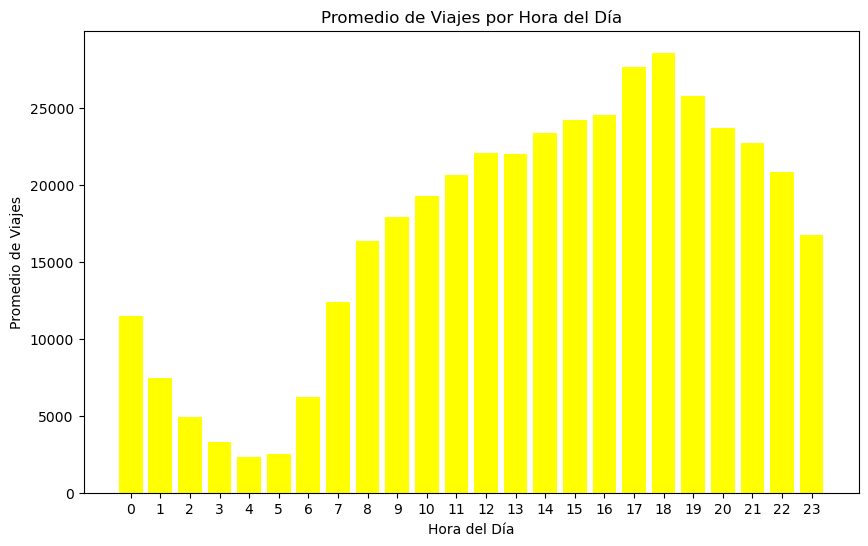

In [43]:
# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
plt.bar(promedio_viajes_por_hora['hour_of_day'], promedio_viajes_por_hora['promedio_viajes'], color='yellow')
plt.title('Promedio de Viajes por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Promedio de Viajes')
plt.xticks(promedio_viajes_por_hora['hour_of_day'])
plt.show()

In [46]:
variacion_por_dia = df_merged_yellow_taxi_Borough_Zona.groupby(['day_of_week', 'hour_of_day']).size().reset_index(name='num_viajes')
print(variacion_por_dia)


    day_of_week  hour_of_day  num_viajes
0        Friday            0       13352
1        Friday            1        8014
2        Friday            2        4583
3        Friday            3        2662
4        Friday            4        2186
..          ...          ...         ...
163   Wednesday           19       31654
164   Wednesday           20       30841
165   Wednesday           21       30100
166   Wednesday           22       25919
167   Wednesday           23       17440

[168 rows x 3 columns]


### Demanda por día y hora de la semana:

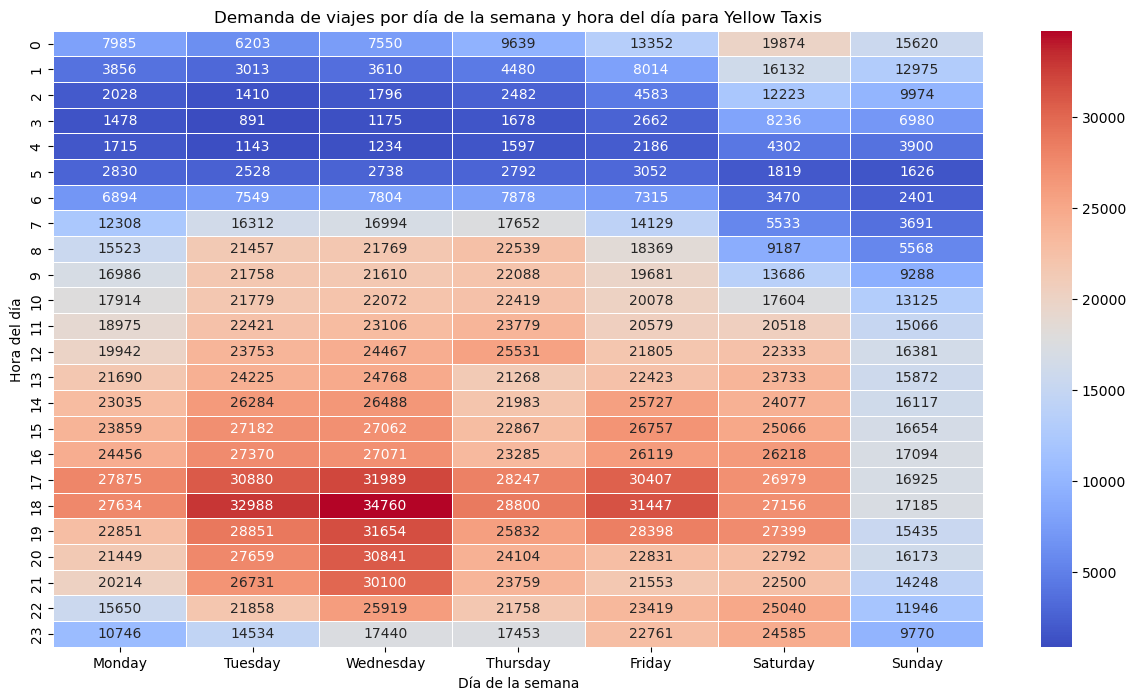

In [55]:
# Ordenar los días de la semana
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
variacion_por_dia['day_of_week'] = pd.Categorical(variacion_por_dia['day_of_week'], categories=ordered_days, ordered=True)

# Configurar el tamaño del gráfico
plt.figure(figsize=(15, 8))

# Crear un gráfico de barras
heatmap_data = variacion_por_dia.pivot_table(index='hour_of_day', columns='day_of_week', values='num_viajes', aggfunc='sum')
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='d', linewidths=.5)

# Configurar etiquetas y título
plt.title('Demanda de viajes por día de la semana y hora del día para Yellow Taxis')
plt.xlabel('Día de la semana')
plt.ylabel('Hora del día')

# Mostrar el gráfico
plt.show()


### Crear una función en Python que tome como parámetros el día actual, el rango horario, la zona de partida y la zona de destino, y devuelva el día y la hora recomendados para viajar donde hay menos cantidad de viajes. 

     # Obtener la fecha y hora actuales


In [44]:

def obtener_dia_actual():
    # Obtener la fecha y hora actuales
    ahora = datetime.now()

    # Obtener el nombre del día de la semana
    dia_actual = ahora.strftime('%A')

    return dia_actual

In [67]:
def sugerir_mejor_momento(rango_horario, zona_partida, zona_destino, grouped_data):
    # Filtrar por rango horario, zona de partida y destino
    filtro_rango_horario = (grouped_data['hour_of_day'].between(rango_horario[0], rango_horario[1]))
    filtro_partida = (grouped_data['Partida_Zone'] == zona_partida)
    filtro_destino = (grouped_data['Destino_Zone'] == zona_destino)

    viajes_filtrados = grouped_data[filtro_rango_horario & filtro_partida & filtro_destino]

    # Agrupar por día de la semana y rango horario, contar la cantidad de viajes y ordenar de menor a mayor
    viajes_por_dia_y_horario = viajes_filtrados.groupby(['day_of_week', 'hour_of_day']).size().sort_values()

    # Obtener la primera y segunda alternativa
    primera_alternativa = viajes_por_dia_y_horario.idxmin()
    viajes_por_dia_y_horario = viajes_por_dia_y_horario.drop(primera_alternativa)
    segunda_alternativa = viajes_por_dia_y_horario.idxmin()

    return primera_alternativa, segunda_alternativa

# Ejemplo de uso
rango_horario = (6, 12)
zona_partida = 'Upper East Side South'
zona_destino = 'Upper East Side North'
resultado = sugerir_mejor_momento(rango_horario, zona_partida, zona_destino, grouped_data)
print("Primera alternativa:", resultado[0])
print("Segunda alternativa:", resultado[1])

Primera alternativa: ('Friday', 6)
Segunda alternativa: ('Sunday', 11)


In [72]:
def sugerir_mejor_momento(rango_horario, zona_partida, zona_destino, grouped_data):
    # Filtrar por rango horario, zona de partida y destino
    filtro_rango_horario = (grouped_data['hour_of_day'].between(rango_horario[0], rango_horario[1]))
    filtro_partida = (grouped_data['Partida_Zone'] == zona_partida)
    filtro_destino = (grouped_data['Destino_Zone'] == zona_destino)

    viajes_filtrados = grouped_data[filtro_rango_horario & filtro_partida & filtro_destino]

    # Agrupar por día de la semana y rango horario, contar la cantidad de viajes y ordenar de menor a mayor
    viajes_por_dia_y_horario = viajes_filtrados.groupby(['day_of_week', 'hour_of_day']).size().sort_values()

    # Obtener la primera y segunda alternativa
    primera_alternativa = viajes_por_dia_y_horario.idxmin()
    viajes_por_dia_y_horario = viajes_por_dia_y_horario.drop(primera_alternativa)
    segunda_alternativa = viajes_por_dia_y_horario.idxmin()

    return primera_alternativa, segunda_alternativa

# Ejemplo de uso
rango_horario = (6, 12)
zona_partida = 'Upper East Side South'
zona_destino = 'Upper East Side North'
resultado = sugerir_mejor_momento(rango_horario, zona_partida, zona_destino, grouped_data)

# Presentar resultados de forma más estética
print("Mejor momento para viajar:")
print(f"Primera alternativa: Día {resultado[0][0]},a las {resultado[0][1]} Horas")
print(f"Segunda alternativa: Día {resultado[1][0]}, a las {resultado[1][1]} Hora")


Mejor momento para viajar:
Primera alternativa: Día Friday,a las 6 Horas
Segunda alternativa: Día Sunday, a las 11 Hora
